Neural Networks for Handwritten Digit Recognition Multiclass

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

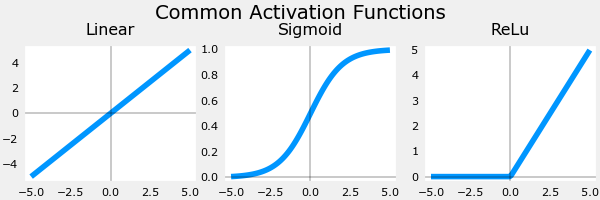

In [2]:
plt_act_trio()

Exercise 1

In [5]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    ### START CODE HERE ###
    ez = np.exp(z)              #element-wise exponenial
    a = ez/np.sum(ez)
    ### END CODE HERE ###
    return a

In [6]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST
test_my_softmax(my_softmax)
# END UNIT TEST

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


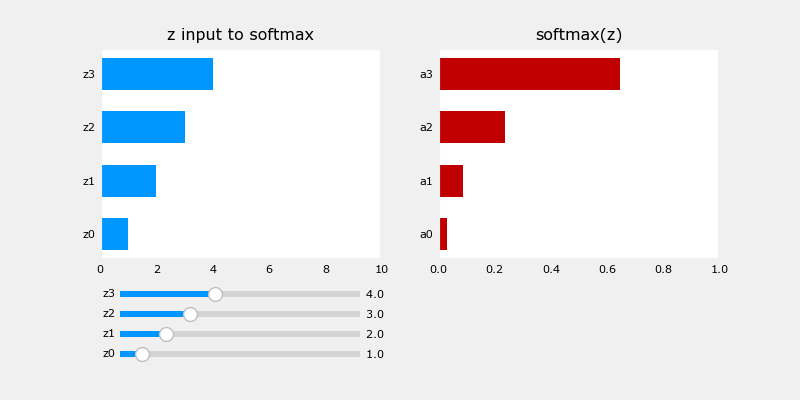

In [7]:
plt.close("all")
plt_softmax(my_softmax)

Neural Networks

In [8]:
# load dataset
X, y = load_data()

In [9]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [10]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


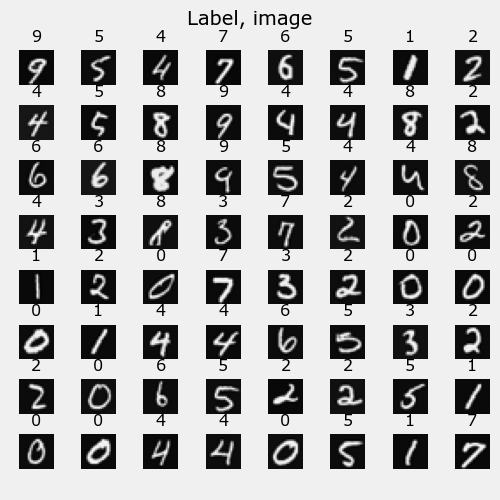

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

Exercise 2

In [15]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        ### START CODE HERE ###
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='relu', name = "L1"),
        Dense(15, activation='relu',  name = "L2"),
        Dense(10, activation='linear', name = "L3"),
        ### END CODE HERE ###
    ], name = "my_model"
)

In [16]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# BEGIN UNIT TEST
test_model(model, 10, 400)
# END UNIT TEST

In [18]:
[layer1, layer2, layer3] = model.layers

In [19]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [20]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 1.9004
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.6198
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.4003
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.3262
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.2835
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.2539
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.2312
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.2129
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.1982
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.1852
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.1731
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.1627
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.1531
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.1436
Epoch 15/40
157/157 ━━━━━━━━━